In [168]:
#Importing necessary Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

In [169]:
#Merge 12 months sales data into a single csv file
dataset = pd.read_csv(r"C:\Users\tripl\OneDrive\Desktop\Python\Project\Sales Analysis - Pandas\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\tripl\OneDrive\Desktop\Python\Project\Sales Analysis - Pandas\SalesAnalysis\Sales_Data")]
all_months_data = pd.DataFrame()

for file in files:
    dataset = pd.read_csv(r"C:\Users\tripl\OneDrive\Desktop\Python\Project\Sales Analysis - Pandas\SalesAnalysis\Sales_Data" + "\\" + file)
    all_months_data = pd.concat([all_months_data, dataset])

all_months_data.to_csv("all_data.csv", index = False)

In [170]:
#Updated Dataframe
combined_dataset = pd.read_csv("all_data.csv")

In [171]:
combined_dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Data Cleaning

In [172]:
#full rows of NaN
combined_dataset.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [173]:
#drop rows with NaN
combined_dataset.dropna(inplace=True)

In [174]:
combined_dataset.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [175]:
#while converting Month to int this error:
# invalid literal for int() with base 10: 'Or'
# 'Or' is in all duplicate rows with column name
temp_dataset = combined_dataset[combined_dataset["Order Date"].str[0:2] == "Or"]
temp_dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [176]:
#removed all rows with "Ör"
combined_dataset = combined_dataset[combined_dataset["Order Date"].str[0:2] != "Or"]

In [177]:
combined_dataset.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [178]:
#While making a sales column this error was shown
# can't multiply sequence by non-int of type 'str'
#converting datatype
combined_dataset["Quantity Ordered"] = pd.to_numeric(combined_dataset["Quantity Ordered"])
combined_dataset["Price Each"] = pd.to_numeric(combined_dataset["Price Each"])

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/1114674881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Quantity Ordered"] = pd.to_numeric(combined_dataset["Quantity Ordered"])
C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/1114674881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Price Each"] = pd.to_numeric(combined_dataset["Price Each"])


In [179]:
combined_dataset.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Adding Month Column

In [180]:
combined_dataset["Month"] = combined_dataset["Order Date"].str[0:2]
combined_dataset["Month"] = combined_dataset["Month"].astype("int32")
combined_dataset.head()

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/2761548360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Month"] = combined_dataset["Order Date"].str[0:2]
C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/2761548360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Month"] = combined_dataset["Month"].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [181]:
combined_dataset.count()

Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
dtype: int64

### Adding Sales Column

In [182]:
combined_dataset["Sales"] = combined_dataset["Quantity Ordered"] * combined_dataset["Price Each"]
combined_dataset.head()

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/1057114984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Sales"] = combined_dataset["Quantity Ordered"] * combined_dataset["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding City Column

In [183]:
combined_dataset["City"] = combined_dataset["Purchase Address"].apply(lambda x: x.split(",")[1] + "("+ x.split(",")[2].split(" ")[1] + ")")
combined_dataset.head()

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/173814600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["City"] = combined_dataset["Purchase Address"].apply(lambda x: x.split(",")[1] + "("+ x.split(",")[2].split(" ")[1] + ")")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


### Best Month for Sales

In [184]:
combined_dataset.groupby("Month").sum().sort_values("Sales", ascending = False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


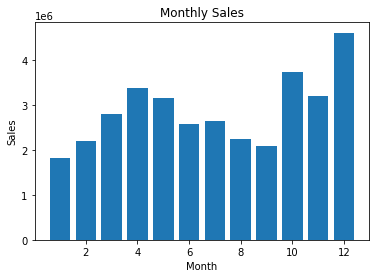

In [185]:
data_ms = combined_dataset.groupby("Month").sum()
months = data_ms.index
sales = data_ms["Sales"].values

plt.bar(months, sales)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.show()

#### Input
December has the highest sales and January has the lowest sales

### City with highest Sales

In [186]:
combined_dataset.groupby("City").sum().sort_values("Sales", ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco(CA),50239,8211461.74,315520,8262203.91
Los Angeles(CA),33289,5421435.23,208325,5452570.80
New York City(NY),27932,4635370.83,175741,4664317.43
Boston(MA),22528,3637409.77,141112,3661642.01
Atlanta(GA),16602,2779908.20,104794,2795498.58
Dallas(TX),16730,2752627.82,104620,2767975.40
Seattle(WA),16553,2733296.01,104941,2747755.48
Portland(OR),11303,1860558.22,70621,1870732.34
Austin(TX),11153,1809873.61,69829,1819581.75


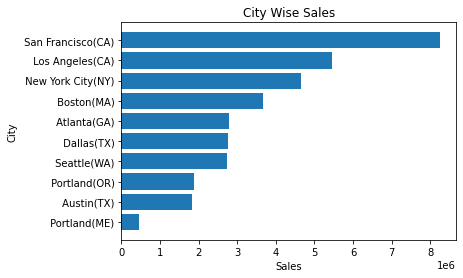

In [187]:
data_cs = combined_dataset.groupby("City").sum().sort_values("Sales", ascending = True)
cities = data_cs.index
sales = data_cs["Sales"].values

plt.barh(cities, sales)
plt.xlabel("Sales")
plt.ylabel("City")
plt.title("City Wise Sales")
plt.show()

#### Input
San Francisco(CA) has the highest sales followed by Los Angeles(CA)
Portland(ME) has the lowest sales

### When to advertise to maximise Customer purchase

In [188]:
combined_dataset["Order Date"] = pd.to_datetime(combined_dataset["Order Date"])

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/4260541878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Order Date"] = pd.to_datetime(combined_dataset["Order Date"])


In [189]:
combined_dataset["Hour"] = combined_dataset["Order Date"].dt.hour
combined_dataset["Minute"] = combined_dataset["Order Date"].dt.minute
combined_dataset.head()

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/3299892715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Hour"] = combined_dataset["Order Date"].dt.hour
C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/3299892715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset["Minute"] = combined_dataset["Order Date"].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


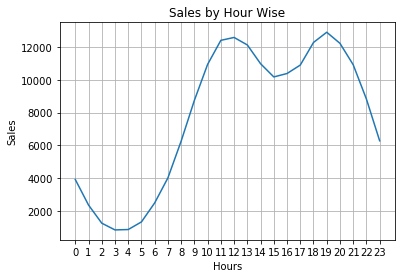

In [190]:
data_h = combined_dataset.groupby("Hour").count()
hours = data_h.index
sales = data_h["Sales"].values

plt.plot(hours, sales)
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Sales")
plt.title("Sales by Hour Wise")
plt.show()

#### Input
Best time to adverstise is between 11 am - 1 pm and 6pm - 8pm

### Products that are sold together the most

In [191]:
#rows in order ID that are duplicated
#keep = False is for keeping all the duplicates
#Adding a grouped column which shows the products with the same order ID
#this gives us products that were ordered together
#dropping order ID that are duplicated with same occurances
temp_dataset = combined_dataset[combined_dataset["Order ID"].duplicated(keep = False)]
temp_dataset["Grouped"] = temp_dataset.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
temp_dataset = temp_dataset[["Order ID","Grouped"]].drop_duplicates()
temp_dataset.head()

C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/867511332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dataset["Grouped"] = temp_dataset.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [192]:
count = Counter()
for row in temp_dataset["Grouped"]: #to get each entries from grouped column
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2))) # can update the length combinations, but here 2 is the most common 
count.most_common(10)  

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Input
Products that are mostly sold together are : 1) iphone & Lightning Charging Cable and 2) Google phone & USB-C Charging Cable

We can offer smart deals here so customers would buy a combo

### Product which sold the most and why

In [193]:
product_group = combined_dataset.groupby("Product")
qty_ordered = product_group.sum()["Quantity Ordered"]

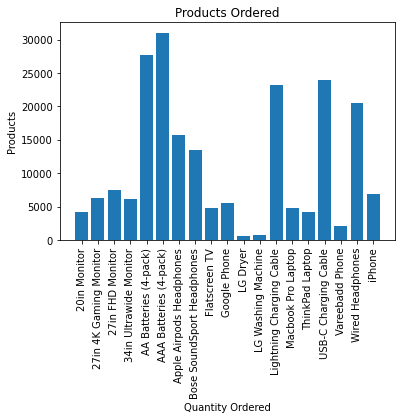

In [194]:
qty_ordered = qty_ordered.reset_index()
products = qty_ordered["Product"].values
qty = qty_ordered["Quantity Ordered"].values

plt.bar(products, qty)
plt.xlabel("Quantity Ordered")
plt.ylabel("Products")
plt.title("Products Ordered")
plt.xticks(products, rotation = "vertical", size =10)
plt.show()


C:\Users\tripl\AppData\Local\Temp/ipykernel_14072/1233607578.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical", size =10)


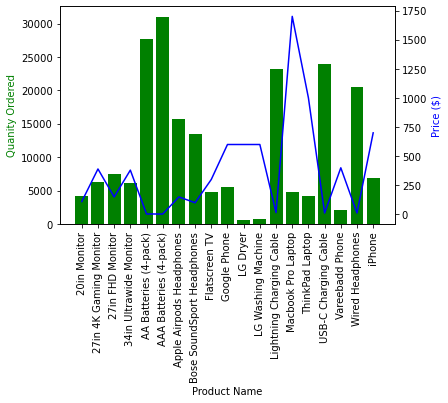

In [195]:
prices = combined_dataset.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, qty, color = "g")
ax2.plot(products, prices, "b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quanity Ordered", color = "g")
ax2.set_ylabel("Price ($)", color = "b")
ax1.set_xticklabels(products, rotation = "vertical", size =10)
plt.show()

### Input
AAA & AA Batteries are sold the most as the prices are low

LG Dryer and washing machine are sold the least and its prices are high

Laptops are costing highest but has more orders than washing machines, this can be because of its high demand.